## Necessary Imports

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library.standard_gates import U1Gate
import matplotlib.pyplot as plt
import tracemalloc
import random
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from math import pi, sqrt, ceil, gcd, isqrt
import timeit

### Declaring the minimum number of qubits as two

In [2]:
num_qubits = 2
runtimes = []

### Letting the user decide as to how many qubits is to be analyzed

In [3]:
# To decide maximum number of qubits we need to analyze the run time
max_qubits = int(input("Enter the maximum number of qubits for which you want to analyze algorithm"))

Enter the maximum number of qubits for which you want to analyze algorithm10


## Bernstein-Vazirani Algorithm

In [4]:
# Define the oracle function that encodes a hidden bitstring
def oracle(n, hidden_string):
    qc = QuantumCircuit(n+1)
    for i, char in enumerate(reversed(hidden_string)):
        if char == '1':
            qc.cx(i, n)
    return qc

# Define the Bernstein-Vazirani algorithm
def bernstein_vazirani(n, hidden_string):
    # Create a quantum circuit with n+1 qubits and n classical bits
    qc = QuantumCircuit(n+1, n)
    # Apply a Hadamard gate to all qubits except the last one
    qc.h(range(n)) 
    # Apply the oracle function
    qc.append(oracle(n, hidden_string), range(n+1))  
    # Apply a Hadamard gate to all qubits except the last one again
    qc.h(range(n))   
    # Measure all qubits except the last one
    qc.measure(range(n), range(n))  
    return qc

In [5]:
number_of_qubits = []
memory_values = []
time_values = []

for i in range(num_qubits, max_qubits+1):
    
    number_of_qubits.append(i)
    
    n = i  # number of bits in the hidden string
    hidden_string = ''.join([random.choice(['0', '1']) for _ in range(n)])
    tracemalloc.start()
    qc = bernstein_vazirani(i, hidden_string)

    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024, memory=True).result()
    # Get the current size of traced memory
    mem_usage = tracemalloc.get_traced_memory()[0] / 1024 / 1024 # convert to MB

    # Stop tracing memory allocations
    tracemalloc.stop()
    memory = result.get_memory()
    
    # Calculate the total time in seconds
    times = timeit.repeat(lambda: result, repeat=10, number=1)
    print(f"Execution time: {min(times)} s")
    
    time_values.append(min(times)) 
    memory_values.append(mem_usage)

Execution time: 9.99999993922529e-08 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.99999993922529e-08 s
Execution time: 9.99999993922529e-08 s
Execution time: 0.0 s
Execution time: 9.99999993922529e-08 s
Execution time: 9.99999993922529e-08 s
Execution time: 9.99999993922529e-08 s


### Plotting memory graph for bernstein vazirani

[2, 3, 4, 5, 6, 7, 8, 9, 10] [16.05518627166748, 0.25553321838378906, 0.12743282318115234, 0.10617542266845703, 0.11051654815673828, 0.10982036590576172, 0.11694717407226562, 0.25281620025634766, 0.25792980194091797]


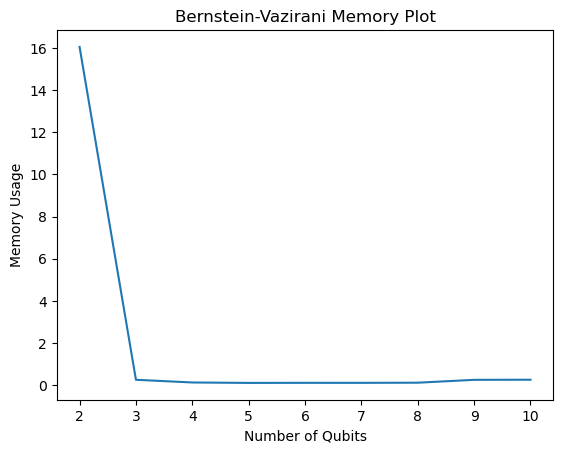

In [6]:
    print(number_of_qubits, memory_values)
    # Plot the curve
    plt.plot(number_of_qubits, memory_values)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Memory Usage")
    plt.title("Bernstein-Vazirani Memory Plot")

    # Show the plot
    plt.show()

### Plotting time graph for bernstein vazirani

[2, 3, 4, 5, 6, 7, 8, 9, 10] [9.99999993922529e-08, 0.0, 0.0, 9.99999993922529e-08, 9.99999993922529e-08, 0.0, 9.99999993922529e-08, 9.99999993922529e-08, 9.99999993922529e-08]


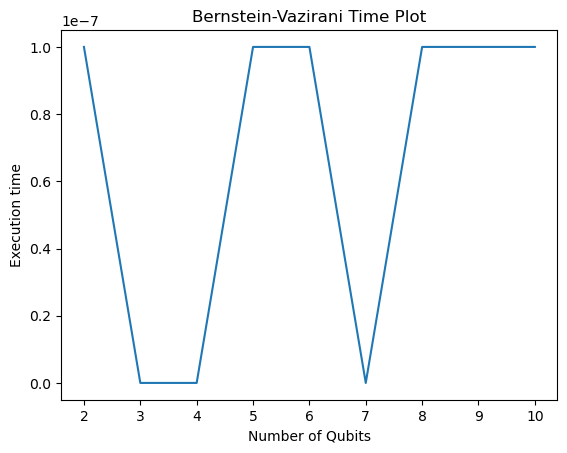

In [7]:
    print(number_of_qubits, time_values)
    # Plot the curve
    plt.plot(number_of_qubits, time_values)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Execution time")
    plt.title("Bernstein-Vazirani Time Plot")

    # Show the plot
    plt.show()

### Histogram of the Bernstein - Vazirani algorithm

1111000010


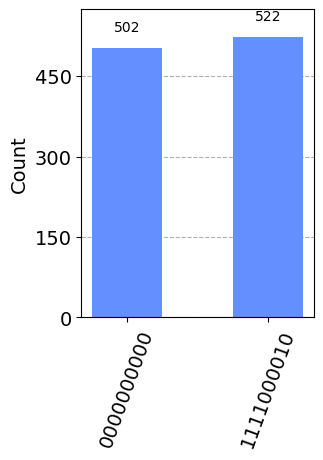

In [9]:
#get the counts and plot histogram
print(hidden_string)
counts=result.get_counts(qc)
plot_histogram(counts,figsize=(3,4))

## Deustch Algorithm

In [10]:
def balanced_function(qc, qubits):
    """
    Apply a balanced function to the given qubits.
    """
    n = len(qubits)
    for i in range(n):
        qc.cx(qubits[i], qubits[(i+1)%n])

In [11]:
def deutsch_algorithm(qubits):
    """
    Implement the Deutsch algorithm for the given number of qubits.
    """
    # Create a quantum circuit with the given number of qubits
    qc = QuantumCircuit(qubits+1, qubits)

    # Step 1: Prepare the input qubit in the state |0>
    qc.x(qubits)

    # Step 2: Apply a Hadamard gate to the input qubit
    qc.h(qubits)

    # Step 3: Apply the black box function to the input qubit
    balanced_function(qc, list(range(qubits+1)))

    # Step 4: Apply a Hadamard gate to the input qubit again
    qc.h(qubits)

    # Step 5: Measure the input qubit and output the result
    qc.measure(qubits, 0)

    return qc

In [12]:
qubit_range = range(num_qubits, max_qubits+1)
number_of_qubits = []
memory_values_deustch = []
time_values_deustch = []

for qubits in qubit_range:
    number_of_qubits.append(qubits)
    
    tracemalloc.start()
    qc = deutsch_algorithm(qubits)
    
    # Execute the circuit on a simulator
    simulator = Aer.get_backend('qasm_simulator')
    result_deustch = execute(qc, backend=simulator, shots=1024,memory=True).result()
    # Get the current size of traced memory
    mem_usage = tracemalloc.get_traced_memory()[0] / 1024 / 1024 # convert to MB

    # Stop tracing memory allocations
    tracemalloc.stop()
    
    # Calculate the total time in seconds
    times = timeit.repeat(lambda: result_deustch, repeat=10, number=1)
    print(f"Execution time: {min(times)} s")
    
    time_values_deustch.append(min(times)) 
    memory_values_deustch.append(mem_usage)

Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999996564147295e-08 s
Execution time: 0.0 s
Execution time: 9.999996564147295e-08 s


### Plotting memory graph for deustch

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.2564115524291992, 0.11400032043457031, 0.2311687469482422, 0.11632633209228516, 0.09161090850830078, 0.11874961853027344, 0.09349632263183594, 0.12080001831054688, 0.0955514907836914]


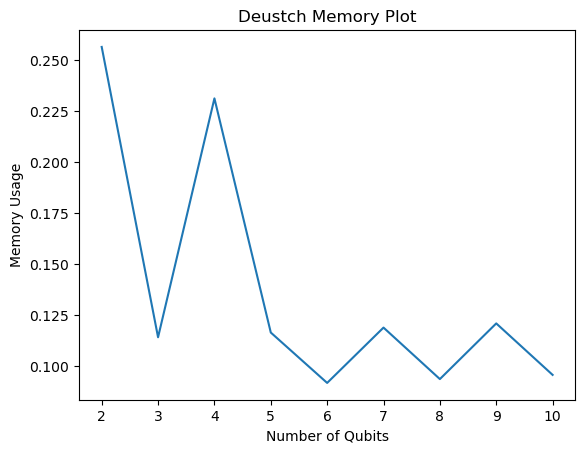

In [13]:
    print(number_of_qubits, memory_values_deustch)
    # Plot the curve
    plt.plot(number_of_qubits, memory_values_deustch)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Memory Usage")
    plt.title("Deustch Memory Plot")

    # Show the plot
    plt.show()

### Plotting time graph for deustch

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.999996564147295e-08, 0.0, 9.999996564147295e-08]


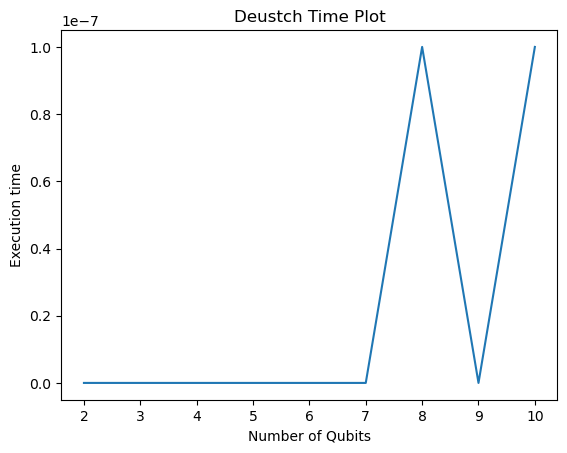

In [14]:
    print(number_of_qubits, time_values_deustch)
    # Plot the curve
    plt.plot(number_of_qubits, time_values_deustch)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Execution time")
    plt.title("Deustch Time Plot")

    # Show the plot
    plt.show()

### Histogram of the Deutsch algorithm

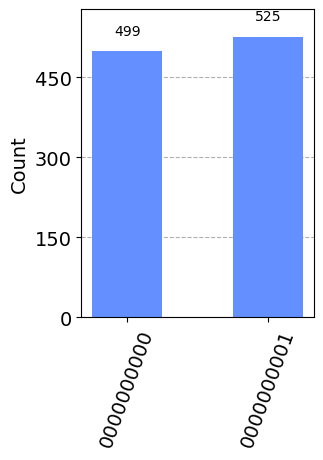

In [16]:
#get the counts and plot histogram

counts=result_deustch.get_counts(qc)
plot_histogram(counts,figsize=(3,4))

## Grover's Algorithm

In [71]:
qubit_range = range(num_qubits, max_qubits+1)
number_of_qubits = []
memory_values_grovers = []
time_values_grovers = []

for n in range(num_qubits, max_qubits+1):
    
    number_of_qubits.append(n)
    # Define the function f as a list of indices of the solutions
    solutions = [2, 3, 5, 7]

    # Define the number of qubits and the number of iterations of the algorithm
    n = n
    iterations = 2
    tracemalloc.start()
    # Create the quantum circuit
    qc = QuantumCircuit(n, n)

    # Apply Hadamard gates to all qubits
    qc.h(range(n))

    # Apply the Grover iteration for the desired number of iterations
    for i in range(iterations):
        # Oracle
        for solution in solutions:
            # Convert the solution index to a binary string and pad with zeros
            b = bin(solution)[2:].zfill(n)
            # Apply X gates to the qubits corresponding to a 1 in the binary string
            for j in range(n):
                if b[j] == '1':
                    qc.x(j)
            # Apply a phase flip to the state corresponding to the solution
            qc.cz(0, n-1)
            # Apply X gates again to the qubits corresponding to a 1 in the binary string
            for j in range(n):
                if b[j] == '1':
                    qc.x(j)
        # Diffusion operator
        qc.h(range(n))
        qc.x(range(n))
        qc.h(n-1)
        qc.mct(list(range(n-1)), n-1)
        qc.h(n-1)
        qc.x(range(n))
        qc.h(range(n))

    # Measure all qubits
    qc.measure(range(n), range(n))

    # Execute the circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    result_grovers = execute(qc, backend=backend, shots=shots,memory=True).result()
    # Get the current size of traced memory
    mem_usage = tracemalloc.get_traced_memory()[0] / 1024 / 1024 # convert to MB

    # Stop tracing memory allocations
    tracemalloc.stop()
    
    # Calculate the total time in seconds
    times = timeit.repeat(lambda: result_grovers, repeat=10, number=1)
    print(f"Execution time: {min(times)} s")
    
    time_values_grovers.append(min(times)) 
    memory_values_grovers.append(mem_usage)


Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999894245993346e-08 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999894245993346e-08 s
Execution time: 9.999894245993346e-08 s
Execution time: 0.0 s
Execution time: 0.0 s


### Plotting memory graph for grovers

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.43683719635009766, 0.277679443359375, 0.13965320587158203, 0.12089729309082031, 0.26856422424316406, 0.27593326568603516, 0.14734172821044922, 0.30976390838623047, 0.3504962921142578]


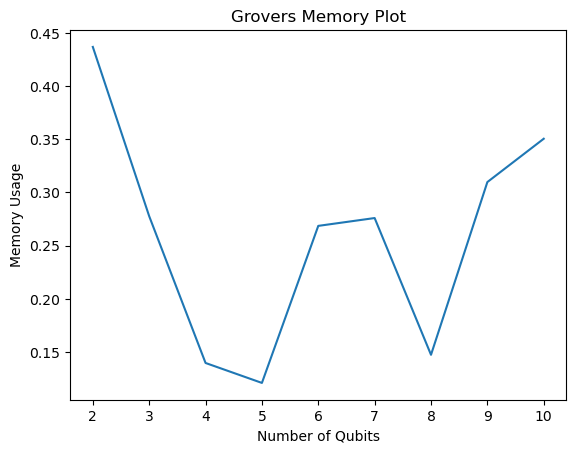

In [72]:
    print(number_of_qubits, memory_values_grovers)
    # Plot the curve
    plt.plot(number_of_qubits, memory_values_grovers)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Memory Usage")
    plt.title("Grovers Memory Plot")

    # Show the plot
    plt.show()

### Plotting time graph for grovers

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.0, 0.0, 9.999894245993346e-08, 0.0, 0.0, 9.999894245993346e-08, 9.999894245993346e-08, 0.0, 0.0]


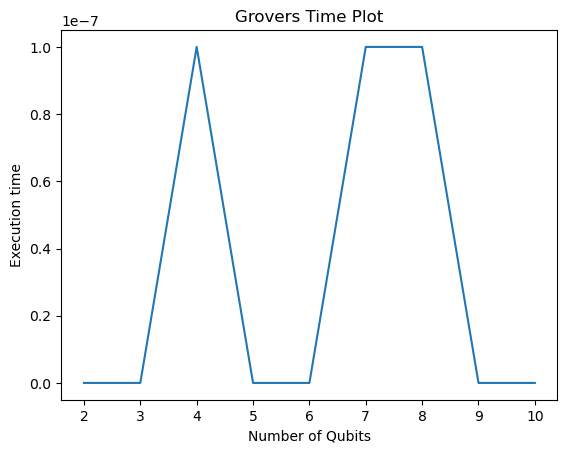

In [73]:
    print(number_of_qubits, time_values_grovers)
    # Plot the curve
    plt.plot(number_of_qubits, time_values_grovers)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Execution time")
    plt.title("Grovers Time Plot")

    # Show the plot
    plt.show()

### Histogram of the Grover's algorithm

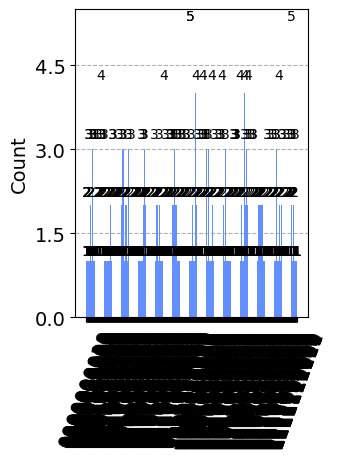

In [74]:
#get the counts and plot histogram
counts=result_grovers.get_counts(qc)
plot_histogram(counts,figsize=(3,4))

## Shor's Algorithm

In [38]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [39]:
a = 13

In [40]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit,n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)),m,j)
        qc.h(j)
    qc.name = "QFT Dagger"
    return qc

In [41]:
qubit_range = range(num_qubits, max_qubits+1)
number_of_qubits = []
memory_values_shors = []
time_values_shors = []

for n_count in range(num_qubits, max_qubits+1):
    
    number_of_qubits.append(n_count)
    # Create QuantumCircuit with n_count counting qubits
    
    tracemalloc.start()
    # plus 4 qubits for U to act on
    qc = QuantumCircuit(n_count + 4, n_count)

    # Initialize counting qubits
    # in state |+>
    for q in range(n_count):
        qc.h(q)
    
    # And auxiliary register in state |1>
    qc.x(3+n_count)

    # Do controlled-U operations
    for q in range(n_count):
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])

    # Do inverse-QFT
    qc.append(qft_dagger(n_count), range(n_count))

    # Measure circuit
    qc.measure(range(n_count), range(n_count))

    backend = Aer.get_backend('qasm_simulator')
    results_shors = execute(qc,backend,shots=1024).result()
    # Get the current size of traced memory
    mem_usage = tracemalloc.get_traced_memory()[0] / 1024 / 1024 # convert to MB

    # Stop tracing memory allocations
    tracemalloc.stop()
    
    # Calculate the total time in seconds
    times = timeit.repeat(lambda: results_shors, repeat=10, number=1)
    print(f"Execution time: {min(times)} s")
    
    time_values_shors.append(min(times)) 
    memory_values_shors.append(mem_usage)

Execution time: 9.999985195463523e-08 s
Execution time: 9.999985195463523e-08 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999985195463523e-08 s
Execution time: 9.999985195463523e-08 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999985195463523e-08 s


### Plotting memory graph for shors

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.3753938674926758, 0.18094348907470703, 0.41584110260009766, 0.6451873779296875, 1.1457195281982422, 1.9810981750488281, 3.311248779296875, 6.360695838928223, 12.185574531555176]


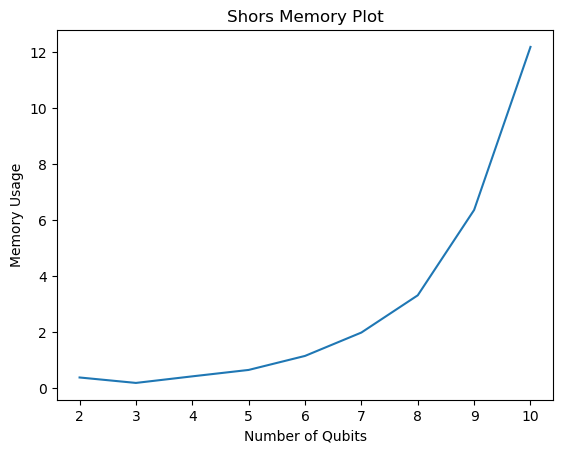

In [42]:
    print(number_of_qubits, memory_values_shors)
    # Plot the curve
    plt.plot(number_of_qubits, memory_values_shors)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Memory Usage")
    plt.title("Shors Memory Plot")

    # Show the plot
    plt.show()

### Plotting time graph for shors

[2, 3, 4, 5, 6, 7, 8, 9, 10] [9.999985195463523e-08, 9.999985195463523e-08, 0.0, 0.0, 9.999985195463523e-08, 9.999985195463523e-08, 0.0, 0.0, 9.999985195463523e-08]


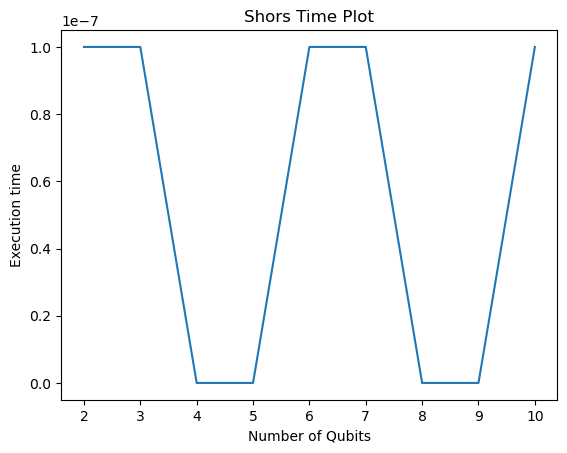

In [43]:
    print(number_of_qubits, time_values_shors)
    # Plot the curve
    plt.plot(number_of_qubits, time_values_shors)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Execution time")
    plt.title("Shors Time Plot")

    # Show the plot
    plt.show()

### Histogram of the Shor's algorithm

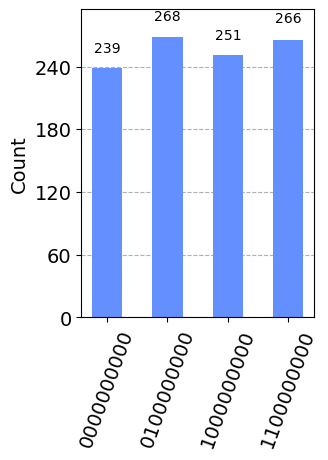

In [44]:
#get the counts and plot histogram
counts=results_shors.get_counts(qc)
plot_histogram(counts,figsize=(3,4))

## Simon's Algorithm

In [66]:
number_of_qubits = []
memory_values_simon = []
time_values_simon = []

for n_count in range(num_qubits, max_qubits+1):
    number_of_qubits.append(n_count)
    
    # Define the number of qubits and the secret string for Simon's algorithm
    tracemalloc.start()

   # Define the function f
    n = n_count  # Number of bits in the input
    s = ''.join([random.choice(['0', '1']) for _ in range(n)])  # Hidden bitstring
    f = lambda x: '{0:b}'.format(int(x, 2) ^ int(x, 2) & int(s, 2)).zfill(n)  # XOR with s

    # Create the quantum circuit
    qc = QuantumCircuit(n*2, n)

    # Apply Hadamard gates to the first n qubits
    for i in range(n):
        qc.h(i)

    # Apply the function f
    for i in range(n):
        qc.cx(i, n + int(f('{0:b}'.format(i).zfill(n)), 2))

    # Apply Hadamard gates to the first n qubits again
    for i in range(n):
        qc.h(i)

    # Measure the first n qubits
    for i in range(n):
        qc.measure(i, i)

    # Run the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    result_simon = execute(qc, backend, shots=shots).result()
    # Get the current size of traced memory
    mem_usage = tracemalloc.get_traced_memory()[0] / 1024 / 1024 # convert to MB

    # Stop tracing memory allocations
    tracemalloc.stop()
    
    # Calculate the total time in seconds
    times = timeit.repeat(lambda: result_simon, repeat=10, number=1)
    print(f"Execution time: {min(times)} s")
    
    time_values_simon.append(min(times)) 
    memory_values_simon.append(mem_usage)

Execution time: 9.999894245993346e-08 s
Execution time: 0.0 s
Execution time: 0.0 s
Execution time: 9.999894245993346e-08 s
Execution time: 9.999894245993346e-08 s
Execution time: 9.999894245993346e-08 s
Execution time: 0.0 s
Execution time: 9.999894245993346e-08 s
Execution time: 0.0 s


### Plotting memory graph for simon's

[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.03537464141845703, 0.19414806365966797, 0.03717803955078125, 0.041522979736328125, 0.04726123809814453, 0.04828643798828125, 0.07223320007324219, 0.05567169189453125, 0.0709981918334961]


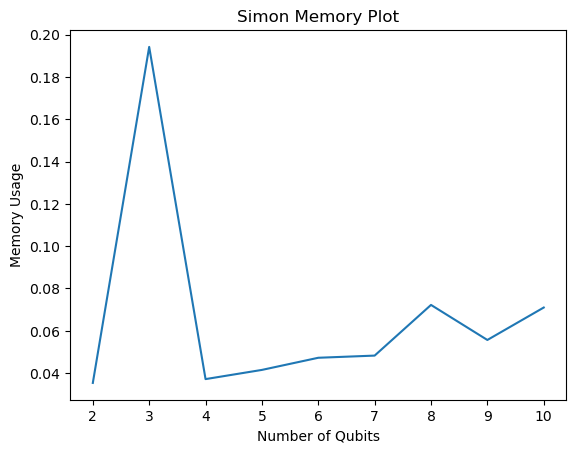

In [67]:
    print(number_of_qubits, memory_values_simon)
    # Plot the curve
    plt.plot(number_of_qubits, memory_values_simon)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Memory Usage")
    plt.title("Simon Memory Plot")

    # Show the plot
    plt.show()

### Plotting time graph for simon's

[2, 3, 4, 5, 6, 7, 8, 9, 10] [9.999894245993346e-08, 0.0, 0.0, 9.999894245993346e-08, 9.999894245993346e-08, 9.999894245993346e-08, 0.0, 9.999894245993346e-08, 0.0]


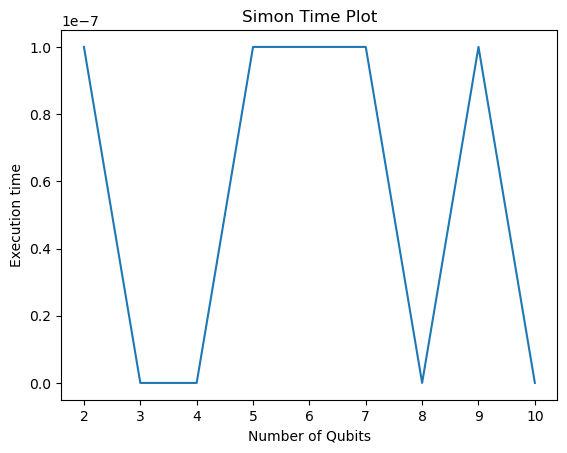

In [68]:
    print(number_of_qubits, time_values_simon)
    # Plot the curve
    plt.plot(number_of_qubits, time_values_simon)

    # Add labels to the plot
    plt.xlabel("Number of Qubits")
    plt.ylabel("Execution time")
    plt.title("Simon Time Plot")

    # Show the plot
    plt.show()

### Histogram of the Simon algorithm

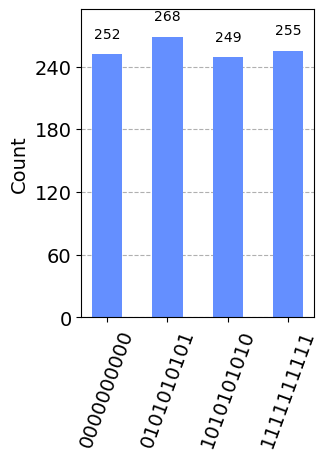

In [70]:
#get the counts and plot histogram
counts=result_simon.get_counts(qc)
plot_histogram(counts,figsize=(3,4))